In [1]:
#load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Wrangling


### Gathering

In [2]:
#load the dataset using pandas
df = pd.read_csv('robotex5.csv')
df.head()

,start_time,start_lat,start_lng,end_lat,end_lng,ride_value
0,2022-03-06 15:02:39.329452000,59.407910,24.689836,59.513027,24.831630,3.51825
1,2022-03-10 11:15:55.177526000,59.441650,24.762712,59.426450,24.783076,0.50750
2,2022-03-06 14:23:33.893257000,59.435404,24.749795,59.431901,24.761588,0.19025
3,2022-03-03 09:11:59.104192000,59.406920,24.659006,59.381093,24.641652,0.75600
4,2022-03-06 00:13:01.290346000,59.434940,24.753641,59.489203,24.876170,2.27100


## Data Assessment

In [3]:
#explore the dataset
#check the dimension
df.shape

(627210, 6)

In [4]:
#check the summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627210 entries, 0 to 627209
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   start_time  627210 non-null  object 
 1   start_lat   627210 non-null  float64
 2   start_lng   627210 non-null  float64
 3   end_lat     627210 non-null  float64
 4   end_lng     627210 non-null  float64
 5   ride_value  627210 non-null  float64
dtypes: float64(5), object(1)
memory usage: 28.7+ MB


In [5]:
#check the summary statistics
df.describe()

,start_lat,start_lng,end_lat,end_lng,ride_value
count,627210.000000,627210.000000,627210.000000,627210.000000,627210.000000
mean,59.428682,24.743468,59.397797,24.724847,2.261384
std,0.021764,0.056872,1.392755,1.650709,44.889892
min,59.321557,24.505199,-37.819979,-122.453962,0.107628
25%,59.418803,24.713140,59.415215,24.707919,0.545250
50%,59.432069,24.744674,59.430697,24.744335,1.059000
75%,59.439024,24.768115,59.439262,24.773924,1.712000
max,59.566998,24.973743,61.552744,144.966110,3172.701000


In [6]:
#check for null values
df.isnull().sum()

start_time    0
start_lat     0
start_lng     0
end_lat       0
end_lng       0
ride_value    0
dtype: int64

In [7]:
#inspect the ride value column
df.ride_value.sort_values(ascending=False).head(30)

191987    3172.701000
142420    2861.653025
392267    2861.651750
362976    2861.651750
475443    2861.573500
217253    2861.573500
617595    2861.573500
213786    2861.573500
494555    2861.573500
334167    2860.572750
125747    2860.572750
269704    2860.572750
590387    2860.572750
153058    2859.863250
475859    2859.863250
549705    2859.863250
407151    2859.863250
596018    2859.863250
606773    2859.858680
270832    2859.665816
219101    2859.651500
518365    2859.639250
58839     2859.603250
172472    2859.515250
199076    2859.456250
458097    2859.431250
128906    2859.431250
288786    2859.403500
505370    2859.379000
152861    2859.379000
Name: ride_value, dtype: float64

#### Insights

There are no null values, the data types are correct except for the start time



#### Corrections
- Change the data type of Start time to datetimeindex 
- Change the start time to the index
- Get the distance between both locations

## Cleaning

In [8]:
#change the datatype of start time
df['start_time'] = pd.to_datetime(df['start_time'])

In [9]:
#check for change
df.dtypes

start_time    datetime64[ns]
start_lat            float64
start_lng            float64
end_lat              float64
end_lng              float64
ride_value           float64
dtype: object

In [10]:
df.head()

,start_time,start_lat,start_lng,end_lat,end_lng,ride_value
0,2022-03-06 15:02:39.329452,59.407910,24.689836,59.513027,24.831630,3.51825
1,2022-03-10 11:15:55.177526,59.441650,24.762712,59.426450,24.783076,0.50750
2,2022-03-06 14:23:33.893257,59.435404,24.749795,59.431901,24.761588,0.19025
3,2022-03-03 09:11:59.104192,59.406920,24.659006,59.381093,24.641652,0.75600
4,2022-03-06 00:13:01.290346,59.434940,24.753641,59.489203,24.876170,2.27100


In [11]:
#split start time into different dates and time
df['year'] = df['start_time'].dt.year
df['month'] = df['start_time'].dt.month
df['day'] = df['start_time'].dt.day
df['weekday'] = df['start_time'].dt.weekday

In [12]:
#change the start time to the index
df.set_index('start_time', inplace=True)

In [13]:
df.head()

,start_lat,start_lng,end_lat,end_lng,ride_value,year,month,day,weekday
start_time,,,,,,,,,
2022-03-06 15:02:39.329452,59.407910,24.689836,59.513027,24.831630,3.51825,2022,3,6,6
2022-03-10 11:15:55.177526,59.441650,24.762712,59.426450,24.783076,0.50750,2022,3,10,3
2022-03-06 14:23:33.893257,59.435404,24.749795,59.431901,24.761588,0.19025,2022,3,6,6
2022-03-03 09:11:59.104192,59.406920,24.659006,59.381093,24.641652,0.75600,2022,3,3,3
2022-03-06 00:13:01.290346,59.434940,24.753641,59.489203,24.876170,2.27100,2022,3,6,6


In [14]:
#create a function to calculate the distance
def dist_convert(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [15]:
#create the distance column and add it to the main dataframe
df['distance'] = dist_convert(df['start_lng'], df['start_lat'], df['end_lng'], df['end_lat'])
df.head()

,start_lat,start_lng,end_lat,end_lng,ride_value,year,month,day,weekday,distance
start_time,,,,,,,,,,
2022-03-06 15:02:39.329452,59.407910,24.689836,59.513027,24.831630,3.51825,2022,3,6,6,14.161756
2022-03-10 11:15:55.177526,59.441650,24.762712,59.426450,24.783076,0.50750,2022,3,10,3,2.043859
2022-03-06 14:23:33.893257,59.435404,24.749795,59.431901,24.761588,0.19025,2022,3,6,6,0.771782
2022-03-03 09:11:59.104192,59.406920,24.659006,59.381093,24.641652,0.75600,2022,3,3,3,3.033288
2022-03-06 00:13:01.290346,59.434940,24.753641,59.489203,24.876170,2.27100,2022,3,6,6,9.177383


In [16]:
df.distance.value_counts().sum()

627210

In [17]:
#view change
df.head()

,start_lat,start_lng,end_lat,end_lng,ride_value,year,month,day,weekday,distance
start_time,,,,,,,,,,
2022-03-06 15:02:39.329452,59.407910,24.689836,59.513027,24.831630,3.51825,2022,3,6,6,14.161756
2022-03-10 11:15:55.177526,59.441650,24.762712,59.426450,24.783076,0.50750,2022,3,10,3,2.043859
2022-03-06 14:23:33.893257,59.435404,24.749795,59.431901,24.761588,0.19025,2022,3,6,6,0.771782
2022-03-03 09:11:59.104192,59.406920,24.659006,59.381093,24.641652,0.75600,2022,3,3,3,3.033288
2022-03-06 00:13:01.290346,59.434940,24.753641,59.489203,24.876170,2.27100,2022,3,6,6,9.177383


In [18]:
df_new = df.copy()

##  Visualizations

#### Is there a correlation between ride value and distance?

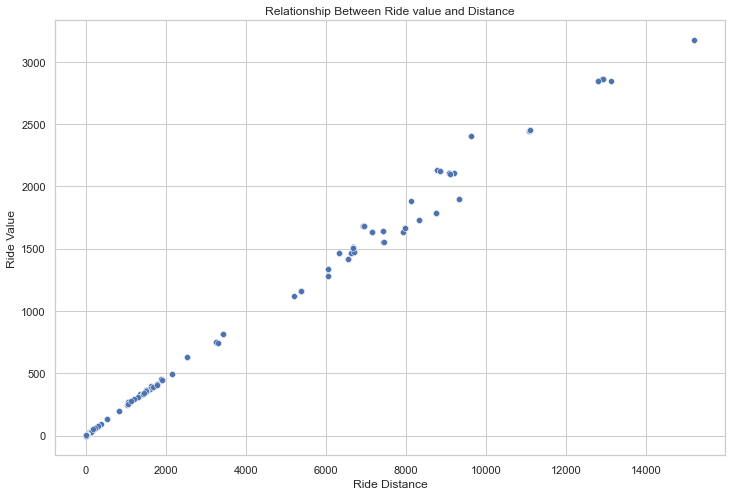

In [19]:
#plot a scatter plot to find the correlation between ride value and distance
plt.figure(figsize=(12,8))
sns.set(style='whitegrid')
sns.scatterplot(x='distance', y='ride_value', data=df_new)
plt.xlabel('Ride Distance')
plt.ylabel('Ride Value')
plt.title('Relationship Between Ride value and Distance');

From the above plot, it shows there is a positive correlation between ride value and distance. Shorter distances bring low pay while longer distances bring higher pay.

Next, using .corr(), determine the amount of positive between them

In [20]:
df_new[['ride_value', 'distance']].corr()

,ride_value,distance
ride_value,1.000000,0.998841
distance,0.998841,1.000000


Both have a very high positive correlation of 0.99

#### What days of the week have the highest demand for rides?

The data gotten is for the month of March for the year 2022

Next, analysis will be done to detect if specific days of the week have more requests for rides than others

In [21]:
#first find out if the days of the week starts from monday(1) or Monday(0)
df_new.weekday.unique()

array([6, 3, 2, 4, 5, 0, 1], dtype=int64)

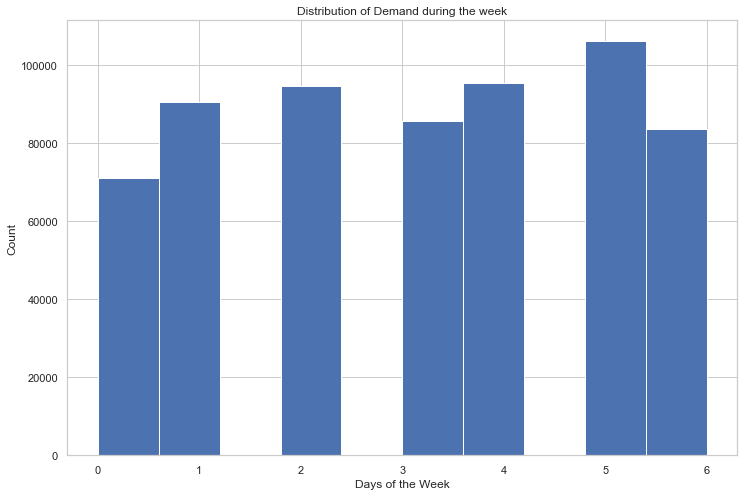

In [22]:
#plot using hist plot
df_new.weekday.plot(kind='hist', figsize=(12, 8))
plt.title('Distribution of Demand during the week')
plt.xlabel('Days of the Week')
plt.ylabel('Count');

Weekday 5 has the highest count of demand, which is Saturday in the month of March, 2022.

Next, the weekdays will be analysed by ranking to know the days with the highest demand in the month

In [23]:
df_new.weekday.value_counts()

5    106174
4     95506
2     94640
1     90616
3     85618
6     83610
0     71046
Name: weekday, dtype: int64

The next day of the week with a high demand after Saturday is Friday then Wednesday, with Monday having the least demand for rides in this month.

#### When was the longest ride and what was the route?

In [24]:
#find the longest distance traveled
df_new.distance.sort_values(ascending=False).head(1)

start_time
2022-03-22 00:43:30.985685    15212.719885
Name: distance, dtype: float64

In [25]:
long_ride = df_new.nlargest(1, 'distance')
long_ride

,start_lat,start_lng,end_lat,end_lng,ride_value,year,month,day,weekday,distance
start_time,,,,,,,,,,
2022-03-22 00:43:30.985685,59.436629,24.751962,-37.819979,144.96611,3172.701,2022,3,22,1,15212.719885


The longest ride was on the 22nd of March, 2022. The ride started at 12:43AM for 15212.7KM from 59.43lat, 24.75lng to -37.8lat, 166.96lng.

This ride was also the highest paid ride with a ride value of 3,172.701 Euro


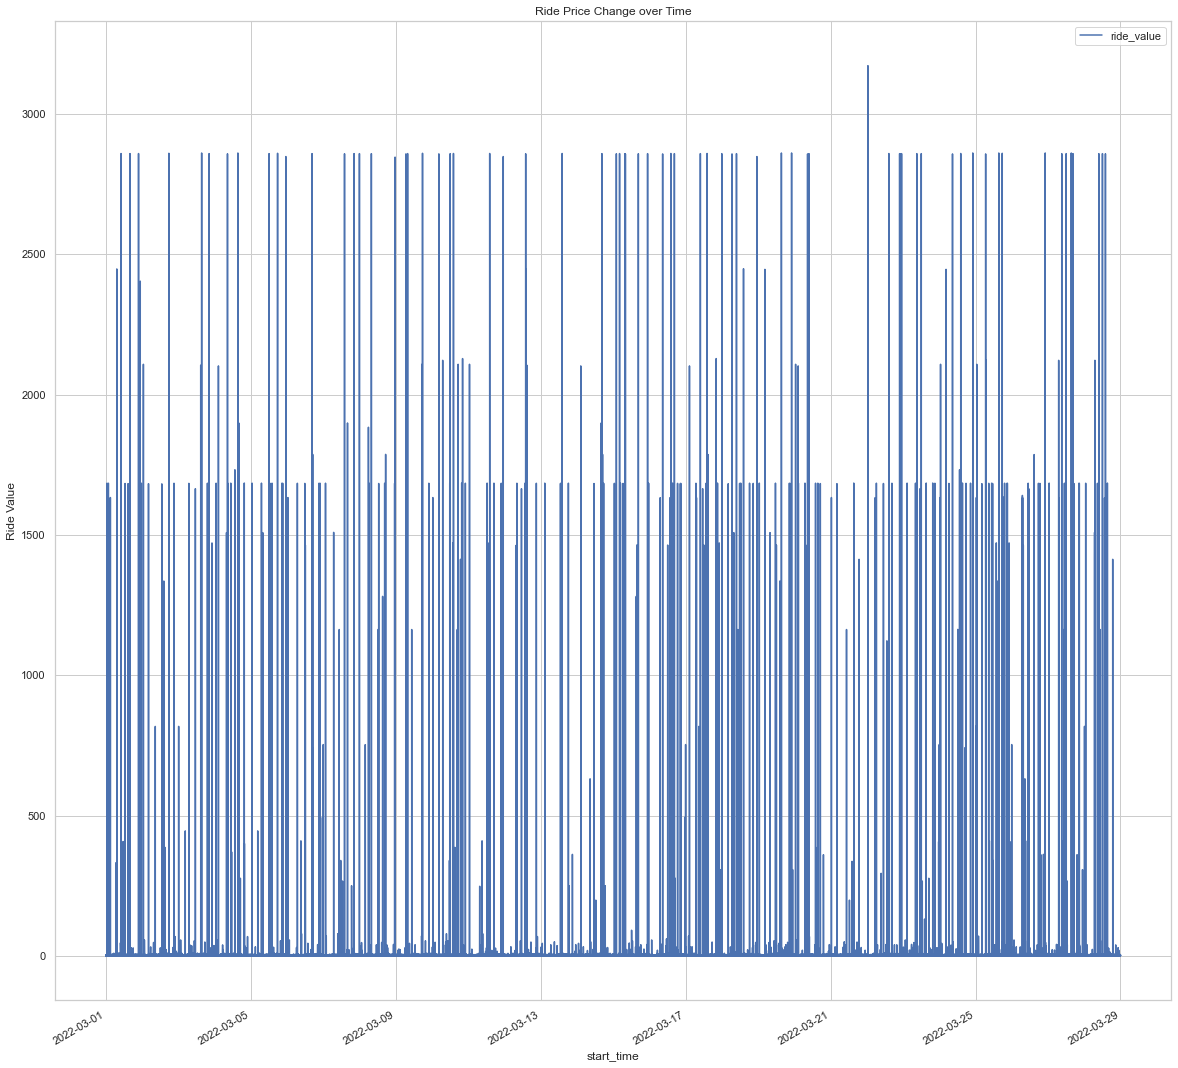

In [36]:
#plot the time series against the ride value to indicate the change in ride prices over time
df_new.plot(y='ride_value', figsize=(20, 20))
plt.ylabel('Ride Value')
plt.title('Ride Price Change over Time');